In [66]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')  # Add parent directory to the Python path
from preprocessing import DataPreprocessor
import os
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_recall_fscore_support


In [67]:
churners_df = pd.read_csv("../../data/BankChurners.csv", index_col='CLIENTNUM', sep= ',')
# Instantiate the class with the dataframe name
preprocessor = DataPreprocessor(df_name=churners_df)

# Use the preprocess method to get preprocessed data
X_train, X_test, y_train, y_test= preprocessor.preprocess()



c:\Users\arian\Becode\Github Repositories\Customer_churn_analysis\src\notebook\..\preprocessing.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.df_name = self.df_name.applymap(lambda x: None if x == 'Unknown' else x)


### Classification with RandomForest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive performance. It's robust to overfitting and can handle non-linear relationships in the data.

- ##### Advantages:
    - Handles high-dimensional data well.
    - Robust to overfitting and less prone to bias.
    - Can handle both numerical and categorical features without much preprocessing.
    - Provides feature importances, which can help interpret the model.
- ##### Considerations:
    - Slower to train compared to some other algorithms, especially with large datasets.
    - May not perform as well as XGBoost on extremely large datasets or in certain scenarios.

In [68]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9855882352941177

In [69]:
print(classification_report(y_test, rfc.predict(X_test)))

                   precision    recall  f1-score   support

Attrited Customer       0.98      1.00      0.99      1724
Existing Customer       1.00      0.98      0.99      1676

         accuracy                           0.99      3400
        macro avg       0.99      0.99      0.99      3400
     weighted avg       0.99      0.99      0.99      3400



Probability of positive class: [[1.   0.  ]
 [0.   1.  ]
 [0.93 0.07]
 [0.04 0.96]
 [0.02 0.98]]


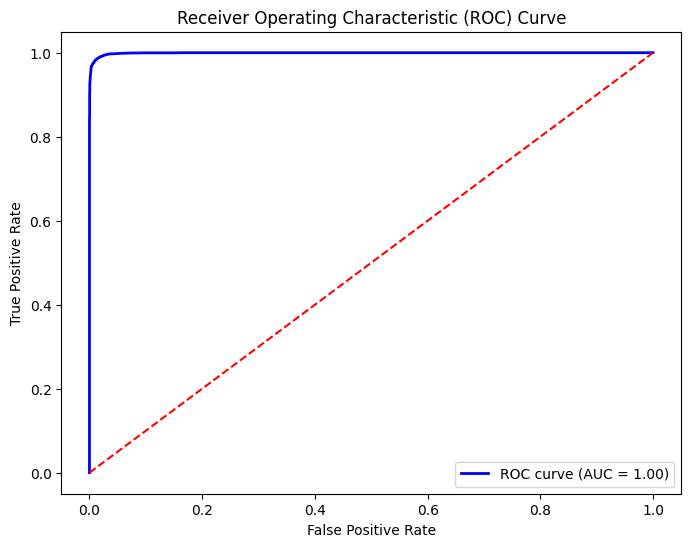

ROC AUC score: 0.9993009948096885


In [70]:
# Make predictions on the test set
y_pred_prob = rfc.predict_proba(X_test)
print(f'Probability of positive class: {y_pred_prob[:5]}')

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"ROC AUC score: {roc_auc}")

In [71]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, pos_label='Attrited Customer')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1_score}")

Accuracy: 0.9855882352941177
Precision: [0.97666477 0.99513086]
Recall: [0.99535963 0.97553699]
F1 score: [0.98592359 0.98523652]


C:\Users\arian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'Attrited Customer') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### Classification with XGBoost (Gradient Boosting Classifier)

Gradient boosting algorithms build decision trees sequentially, where each tree corrects the errors of the previous ones. They often perform well in practice and can handle complex relationships between features and the target variable.

- ##### Advantages:
    - Efficient and scalable, making it suitable for large datasets.
    - Handles missing values internally.
- ##### Considerations:
    - Requires more tuning of hyperparameters compared to Random Forest.
    - Can be sensitive to noisy data.
    - May not provide feature importances as straightforwardly as Random Forest
    - can overfit